# CLV

  * Using [Lifetimes](https://github.com/CamDavidsonPilon/lifetimes) package to calculate CLV.
  * [Bruce G.S. Hardie](http://www.brucehardie.com/talks.html), London Business School
  * Followed this [tutorial](https://www.internetrix.com.au/blog/how-to-model-customer-lifetime-value/)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cdnow_customers_summary_with_transactions.csv')

In [3]:
df.head(3)

,ID,frequency,recency,T,money
0,1,2,30.43,38.86,22.35
1,2,1,1.71,38.86,11.77
2,3,0,0.00,38.86,0.00


In [4]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter()
bgf.fit(df['frequency'], df['recency'], df['T'])

<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>

In [5]:
from lifetimes import ParetoNBDFitter
pnb = ParetoNBDFitter()
pnb.fit(df['frequency'], df['recency'], df['T'])

<lifetimes.ParetoNBDFitter: fitted with 2357 subjects, alpha: 10.58, beta: 11.67, r: 0.55, s: 0.61>

In [6]:
from lifetimes import ModifiedBetaGeoFitter
mbgf = BetaGeoFitter()
mbgf.fit(df['frequency'], df['recency'], df['T'])

<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>

In [7]:
t = 4
df['predicted_purchases'] = df.apply(lambda r: mbgf.conditional_expected_number_of_purchases_up_to_time(t, r['frequency'], r['recency'], r['T']), axis=1)
df.sort_values(by=['predicted_purchases']).tail(5)

,ID,frequency,recency,T,money,predicted_purchases
508,509,18,35.14,35.86,78.63,1.656500
840,841,19,34.00,34.14,29.49,1.848656
1980,1981,17,28.43,28.86,48.23,1.887453
156,157,29,37.71,38.00,26.26,2.583613
1515,1516,26,30.86,31.00,39.97,2.759146


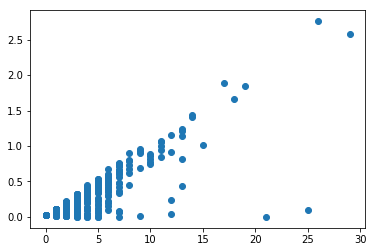

In [8]:
plt.scatter(df['frequency'], df['predicted_purchases'])
plt.show()

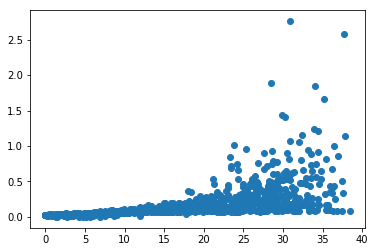

In [9]:
plt.scatter(df['recency'], df['predicted_purchases'])
plt.show()

### Calculate Expect Value

  * It is used to estimate the average monetary value of customer transactions.

In [10]:
from lifetimes import GammaGammaFitter

gg = GammaGammaFitter()
gg.fit(df[df['money'] > 0]['frequency'], df[df['money'] > 0]['money'])

<lifetimes.GammaGammaFitter: fitted with 946 subjects, p: 6.25, q: 3.74, v: 15.45>

In [11]:
df['expected_value'] = df[['frequency', 'money']].apply(lambda r: gg.conditional_expected_average_profit(r['frequency'], r['money']), axis=1)

In [12]:
df.head(5)

,ID,frequency,recency,T,money,predicted_purchases,expected_value
0,1,2,30.43,38.86,22.35,0.147316,24.658620
1,2,1,1.71,38.86,11.77,0.023917,18.911488
2,3,0,0.00,38.86,0.00,0.022116,35.171006
3,4,0,0.00,38.86,0.00,0.022116,35.171006
4,5,0,0.00,38.86,0.00,0.022116,35.171006
